<a href="https://colab.research.google.com/github/aymnblh/Sports-Data-Analyse/blob/main/Descriptive%2CSummary_And_Correlation_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1- Data Coding and Merging

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("Assignment Data/Week 2/NHL_team.csv")
display(NHL_Team)

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago
5,6,7,St. Louis Blues,Blues,St. Louis,STL,STL,St Louis
6,7,8,Pittsburgh Penguins,Penguins,Pittsburgh,PIT,PIT,Pittsburgh
7,8,10,Edmonton Oilers,Oilers,Edmonton,EDM,EDM,Edmonton
8,9,11,Calgary Flames,Flames,Calgary,CGY,CGY,Calgary
9,10,14,Philadelphia Flyers,Flyers,Philadelphia,PHI,PHI,Philadelphia


In [ ]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("Assignment Data/Week 2/NHL_competition.csv")
NHL_Competition.head()

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN


In [ ]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("Assignment Data/Week 2/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [ ]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [ ]:
NHL_Team.drop(['Unnamed: 0','abbr','tname','lname','sname'], axis=1, inplace=True)
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)

In [ ]:
NHL_Competition.drop(['Unnamed: 0','tz','start','end'], axis=1, inplace=True)
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)

In [ ]:
NHL_Game.drop(['X','period','status'], axis=1, inplace=True)

In [ ]:
NHL_Game=pd.merge(NHL_Game, NHL_Team, on=['tid'])

In [ ]:
NHL_Game=pd.merge(NHL_Game, NHL_Competition, on=['comp_id'])

In [ ]:
NHL_Game['hgd']=NHL_Game['hscore']-NHL_Game['ascore']
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0


In [ ]:
NHL_Game['hgd']=NHL_Game[pd.notnull(NHL_Game["hgd"])]

In [ ]:
NHL_Game['hgd'].describe()

count     18506.0
unique     9253.0
top        9473.0
freq          2.0
Name: hgd, dtype: float64

In [ ]:
NHL_Game.dropna(axis=0,how='any')

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,981
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1607
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2403
5,1541,2,1/31/2018,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1541
6,1243,2,1/5/2018,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1243
7,1570,2,2/2/2018,7.0,4.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1570
8,2314,2,3/24/2018,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2314
9,709,2,11/26/2017,2.0,5.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,709
10,196,2,10/19/2017,2.0,0.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,196
11,1729,2,2/14/2018,3.0,5.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1729


In [ ]:
NHL_Game.isnull().sum()

gid                   0
comp_id               0
date                  0
ascore              440
hscore              440
home_away             0
tid                   0
team_name             0
tricode               0
year                  0
type                  0
competition_name      0
hgd                 440
dtype: int64

In [ ]:
import datetime
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])

In [ ]:
NHL_Game.sort_values(by=['date'], ascending=[False]).head(15)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2568,2733,2541,2018-06-14,NaN,NaN,away,5,Washington Capitals,WSH,2017,3,2017 NHL Playoff,NaN
2634,2733,2541,2018-06-14,NaN,NaN,home,59,Vegas Golden Knights,VGK,2017,3,2017 NHL Playoff,NaN
2619,2732,2541,2018-06-11,NaN,NaN,away,59,Vegas Golden Knights,VGK,2017,3,2017 NHL Playoff,NaN
2584,2732,2541,2018-06-11,NaN,NaN,home,5,Washington Capitals,WSH,2017,3,2017 NHL Playoff,NaN
2570,2730,2541,2018-06-08,4.0,3.0,away,5,Washington Capitals,WSH,2017,3,2017 NHL Playoff,2730
2636,2730,2541,2018-06-08,4.0,3.0,home,59,Vegas Golden Knights,VGK,2017,3,2017 NHL Playoff,2730
2586,2727,2541,2018-06-05,2.0,6.0,home,5,Washington Capitals,WSH,2017,3,2017 NHL Playoff,2727
2620,2727,2541,2018-06-05,2.0,6.0,away,59,Vegas Golden Knights,VGK,2017,3,2017 NHL Playoff,2727
2622,2725,2541,2018-06-03,1.0,3.0,away,59,Vegas Golden Knights,VGK,2017,3,2017 NHL Playoff,2725
2587,2725,2541,2018-06-03,1.0,3.0,home,5,Washington Capitals,WSH,2017,3,2017 NHL Playoff,2725


In [ ]:
NHL_Game.sort_values(by=['date'], ascending=[True]).head(25)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,5664
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,5662
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,5666
8697,5662,5662,2010-10-07,2.0,3.0,away,2,Montréal Canadiens,MTL,2010,2,2010 NHL Regular Season,5662
9006,5664,5662,2010-10-07,3.0,2.0,away,14,Philadelphia Flyers,PHI,2010,2,2010 NHL Regular Season,5664
8424,5666,5662,2010-10-07,4.0,3.0,away,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,5666
8473,5677,5662,2010-10-08,1.0,2.0,home,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,5677
9261,5679,5662,2010-10-08,0.0,4.0,away,21,Anaheim Ducks,ANA,2010,2,2010 NHL Regular Season,5679
8277,5681,5662,2010-10-08,2.0,1.0,away,17,Buffalo Sabres,BUF,2010,2,2010 NHL Regular Season,5681
8831,5674,5662,2010-10-08,4.0,3.0,away,46,Dallas Stars,DAL,2010,2,2010 NHL Regular Season,5674


In [ ]:
NHL_Home=NHL_Game[(NHL_Game.home_away == 'home')]
NHL_Away=NHL_Game[(NHL_Game.home_away == 'away')]
NHL_Home.rename(columns={'hscore':'goals_for','ascore':'goals_against'}, inplace=True)
NHL_Away.rename(columns={'ascore':'goals_for','hscore':'goals_against'}, inplace=True)
NHL_Away.head()

,gid,comp_id,date,goals_for,goals_against,home_away,tid,team_name,tricode,year,type,competition_name,hgd
0,37,2,2017-10-07,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN
1,1623,2,2018-02-06,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN
2,981,2,2017-12-15,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,981
3,1607,2,2018-02-04,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1607
4,2403,2,2018-03-30,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2403


In [ ]:
NHL_Home.head()

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2254
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2050
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,844
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,659
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2147


In [ ]:
NHL_Home['win']=np.where(NHL_Home['hgd']> 0,1,np.where(NHL_Home['hgd']==0,.5,0))
NHL_Away['win']=np.where(NHL_Away['hgd']< 0,1,np.where(NHL_Away['hgd']==0,.5,0))

In [ ]:
NHL_Home.head(5)

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2254,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2050,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,844,1.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,659,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2147,1.0


In [ ]:
NHL_Away.head(5)

,gid,comp_id,date,goals_for,goals_against,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
0,37,2,2017-10-07,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN,0.0
1,1623,2,2018-02-06,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN,0.0
2,981,2,2017-12-15,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,981,0.0
3,1607,2,2018-02-04,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1607,0.0
4,2403,2,2018-03-30,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2403,0.0


In [ ]:
frames = [NHL_Home, NHL_Away]
NHL_Game = pd.concat(frames)
#NHL_Game = pd.merge(NHL_Home, NHL_Away, on = ['gid'])
NHL_Game.head()

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,year
41,2,2017 NHL Regular Season,2018-03-20,2254,3.0,4.0,2254,home,Tampa Bay Lightning,25,TBL,2,1.0,2017
42,2,2017 NHL Regular Season,2018-03-07,2050,4.0,5.0,2050,home,Tampa Bay Lightning,25,TBL,2,1.0,2017
43,2,2017 NHL Regular Season,2017-12-06,844,2.0,6.0,844,home,Tampa Bay Lightning,25,TBL,2,1.0,2017
44,2,2017 NHL Regular Season,2017-11-23,659,2.0,3.0,659,home,Tampa Bay Lightning,25,TBL,2,1.0,2017
45,2,2017 NHL Regular Season,2018-03-13,2147,7.0,4.0,2147,home,Tampa Bay Lightning,25,TBL,2,1.0,2017


In [ ]:
NHL_Team_Stats=NHL_Game.groupby(['tid','competition_name','type'])['win','goals_for','goals_against'].sum().reset_index()
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against
0,1,2010 NHL Regular Season,2,41.0,223.0,259.0
1,1,2011 NHL Regular Season,2,19.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0
3,1,2012 NHL Regular Season,2,22.0,144.0,129.0
4,1,2013 NHL Regular Season,2,40.0,231.0,250.0


In [ ]:
NHL_Game_Count=NHL_Game.groupby(['tid','competition_name','type'])['gid'].count().reset_index()
NHL_Game_Count.rename(columns={'gid':'game_count'}, inplace=True)
NHL_Game_Count.head()

,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,48
4,1,2013 NHL Regular Season,2,82


In [ ]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid', 'competition_name', 'type'])

In [ ]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Team, on=['tid'])
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode
0,1,2010 NHL Regular Season,2,41.0,223.0,259.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,19.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,22.0,144.0,129.0,48,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,40.0,231.0,250.0,82,Toronto Maple Leafs,TOR


In [ ]:
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")

In [ ]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_PPPK, on=['tricode','competition_name'])
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf
0,1,2010 NHL Regular Season,2,41.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0
1,1,2011 NHL Regular Season,2,19.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR,30,29,5.0
3,1,2012 NHL Regular Season,2,22.0,144.0,129.0,48,Toronto Maple Leafs,TOR,234,230,39.0
4,1,2013 NHL Regular Season,2,40.0,231.0,250.0,82,Toronto Maple Leafs,TOR,362,342,61.0


In [ ]:
NHL_Team_Stats['win_pct']=NHL_Team_Stats['win']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf']=NHL_Team_Stats['goals_for']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_ga']=NHL_Team_Stats['goals_against']/NHL_Team_Stats['game_count']

In [ ]:
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,41.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.500000,2.719512,3.158537
1,1,2011 NHL Regular Season,2,19.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.475000,3.225000,3.225000
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR,30,29,5.0,0.428571,2.571429,3.142857
3,1,2012 NHL Regular Season,2,22.0,144.0,129.0,48,Toronto Maple Leafs,TOR,234,230,39.0,0.458333,3.000000,2.687500
4,1,2013 NHL Regular Season,2,40.0,231.0,250.0,82,Toronto Maple Leafs,TOR,362,342,61.0,0.487805,2.817073,3.048780


In [ ]:
NHL_Team_R_Stats=NHL_Team_Stats[(NHL_Team_Stats.type == 2)]
NHL_Team_R_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,41.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.500000,2.719512,3.158537
1,1,2011 NHL Regular Season,2,19.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.475000,3.225000,3.225000
3,1,2012 NHL Regular Season,2,22.0,144.0,129.0,48,Toronto Maple Leafs,TOR,234,230,39.0,0.458333,3.000000,2.687500
4,1,2013 NHL Regular Season,2,40.0,231.0,250.0,82,Toronto Maple Leafs,TOR,362,342,61.0,0.487805,2.817073,3.048780
5,1,2014 NHL Regular Season,2,41.0,209.0,258.0,82,Toronto Maple Leafs,TOR,319,343,54.0,0.500000,2.548780,3.146341


# Part 2 - Descriptive and Summary Analyses

In [ ]:
NHL_Game.groupby(['home_away'])['goals_for'].describe()

,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0
home,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0


In [ ]:
NHL_Game.groupby(['home_away'])['goals_against'].describe()

,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f889314cda0>,
      dtype=object)

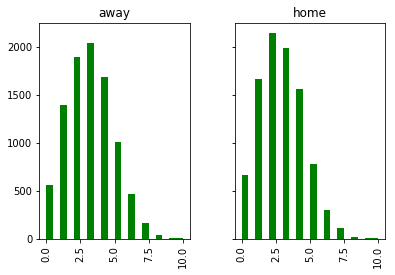

In [ ]:
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)

## Part 3 - Correlation Analyses


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

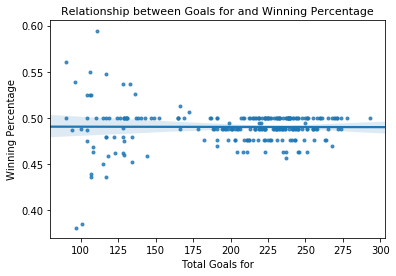

In [ ]:
import seaborn as sns
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [ ]:
NHL_Team_R_Stats['win_pct'].corr(NHL_Team_R_Stats['goals_for'])

-0.005708739691463948

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

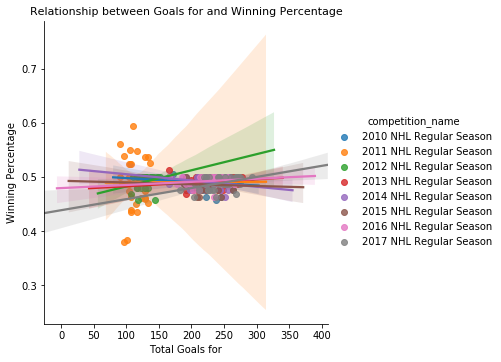

In [ ]:
import seaborn as sns
sns.lmplot(x='goals_for', y='win_pct',hue='competition_name' ,data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [ ]:
NHL_Team_R_Stats = NHL_Team_R_Stats[~NHL_Team_R_Stats.competition_name.str.contains("2011 NHL Regular Season")]
NHL_Team_R_Stats = NHL_Team_R_Stats[~NHL_Team_R_Stats.competition_name.str.contains("2012 NHL Regular Season")]
#NHL_Team_R_Stats = NHL_Team_R_Stats.drop((NHL_Team_R_Stats.competition_name.str.contains('2011 NHL Regular Season')&(NHL_Team_R_Stats.competition_name=='2012 NHL Regular Season'))
NHL_Team_R_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,41.0,223.0,259.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.500000,2.719512,3.158537
4,1,2013 NHL Regular Season,2,40.0,231.0,250.0,82,Toronto Maple Leafs,TOR,362,342,61.0,0.487805,2.817073,3.048780
5,1,2014 NHL Regular Season,2,41.0,209.0,258.0,82,Toronto Maple Leafs,TOR,319,343,54.0,0.500000,2.548780,3.146341
6,1,2015 NHL Regular Season,2,40.0,196.0,238.0,82,Toronto Maple Leafs,TOR,324,307,27.0,0.487805,2.390244,2.902439
8,1,2016 NHL Regular Season,2,41.0,255.0,246.0,82,Toronto Maple Leafs,TOR,321,321,69.0,0.500000,3.109756,3.000000


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

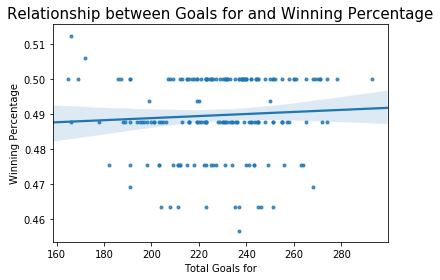

In [ ]:
sns.regplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats,  marker='.')
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=15)

In [ ]:
NHL_Team_R_Stats['win_pct'].corr(NHL_Team_R_Stats['goals_for'])

0.06405158032591943

## Uncomment this Section once your assignment is complete

In [ ]:
#Save Dataframes as .csv files
NHL_Game.to_csv("NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)